In [2]:
import os
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pdb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
import re
import numpy as np

In [7]:
sps = set(stopwords.words('english'))
file = open("atire_puurula.txt")
for line in file:
    sps.add(line.strip())
file = open("my_stops.txt")
for line in file:
    sps.add(line.strip())
file = open("names.txt")
for line in file:
    sps.add(line.strip())

In [8]:
genres = ["fantasy", "horror", "mystery", "romance", "scifi"]

"""
for genre in genres:
    count = 0
    for filename in os.listdir("./" + genre):
        tempFile = open("./" + genre + "/" + filename)
        
        with open("./" + genre + str(count) + ".txt", "w") as file:
            for line in tempFile.readlines()[1000:4000]:
                file.write(line)
        count += 1
        tempFile.close()
"""

data = []
labels = []

sps.add
lemma = WordNetLemmatizer()
for genre in genres:
    for i in range(5):
        tempFile = open("./data/" + genre + str(i) + ".txt")
        content = tempFile.read()
        tokens = word_tokenize(content)
        tokens = list(map(lemma.lemmatize, tokens))
        tokens = [w.lower() for w in tokens if w.isalpha()]
        data.append([w for w in tokens if not w in sps])
        labels.append(genre)
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

In [9]:
dictionary.num_pos

161446

In [10]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=100)

In [11]:
ldamodel.log_perplexity(corpus)

-8.636392544816152

In [17]:
perplexities = []
for i in range(1, 20):
    print(i)
    tempmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=20)
    perplex = tempmodel.bound(corpus)
    perplexities.append(np.exp2(-perplex / sum(cnt for document in list(corpus) for _, cnt in document)))
    print(perplexities[-1])

1
429.64722028764106
2
417.7778110287948
3
411.79098522828735
4
408.15444762037447
5
409.7191102330433
6
400.05764972892877
7
391.8652023582866
8
408.42225634064414
9
391.1381476343413
10
389.5390044109706
11
396.89649920741715
12
415.59129900109826
13
405.3356977532632
14
402.96773473923656
15
399.994747096335
16
397.54863555713814
17
401.0529879767583
18
418.05478675919113
19
407.94331966216987


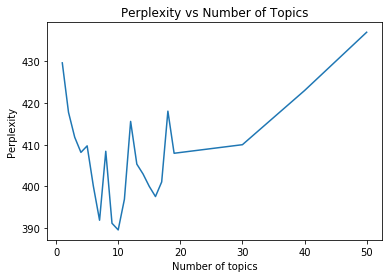

In [23]:
plt.plot(list(range(1,20)) + [30,40,50], perplexities + [410, 423,437])
plt.ylabel("Perplexity")
plt.xlabel("Number of topics")
plt.title("Perplexity vs Number of Topics")
plt.show()

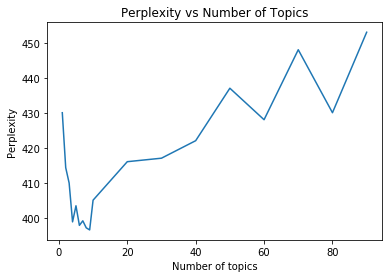

In [16]:
plt.plot([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90],[430,414.3,409.9,398.8,403.4,397.8,399.1,397.1,396.5,405,416,417,422,437,428,448,430,453])
plt.ylabel("Perplexity")
plt.xlabel("Number of topics")
plt.title("Perplexity vs Number of Topics")
plt.show()

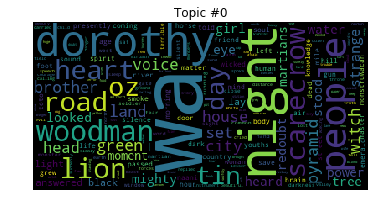

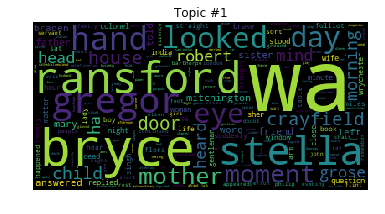

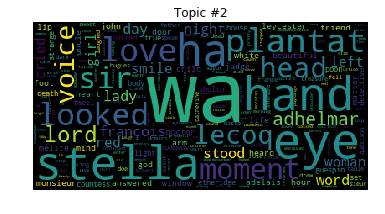

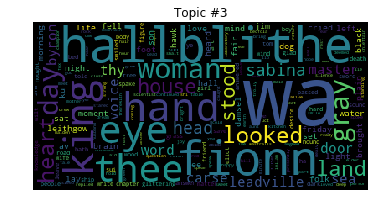

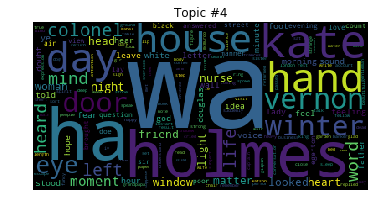

In [44]:
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [39]:
arr = []
for genre in genres:
    arr += [genre] * 5
print(arr)
for x, y in zip(corpus, arr):
    print(ldamodel.get_document_topics(x), y)

['fantasy', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 'horror', 'horror', 'horror', 'horror', 'horror', 'mystery', 'mystery', 'mystery', 'mystery', 'mystery', 'romance', 'romance', 'romance', 'romance', 'romance', 'scifi', 'scifi', 'scifi', 'scifi', 'scifi']
[(2, 0.99987274)] fantasy
[(3, 0.99987817)] fantasy
[(1, 0.99989796)] fantasy
[(4, 0.9999032)] fantasy
[(3, 0.9999031)] fantasy
[(2, 0.9998788)] horror
[(2, 0.9998763)] horror
[(2, 0.9999141)] horror
[(2, 0.4951236), (4, 0.5021992)] horror
[(1, 0.7998697), (2, 0.19990867)] horror
[(2, 0.32160136), (3, 0.6783121)] mystery
[(2, 0.99986905)] mystery
[(2, 0.9998899)] mystery
[(2, 0.99986947)] mystery
[(1, 0.9960054)] mystery
[(1, 0.99987733)] romance
[(1, 0.9998916)] romance
[(1, 0.9998943)] romance
[(1, 0.998682)] romance
[(2, 0.99986786)] romance
[(1, 0.99935997)] scifi
[(0, 0.99985486)] scifi
[(1, 0.99916863)] scifi
[(3, 0.99991405)] scifi
[(2, 0.999528)] scifi


In [103]:
list(map(lemma.lemmatize,["booker"]))

['booker']

In [33]:
# generate LDA model
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=100)

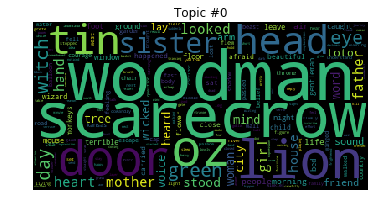

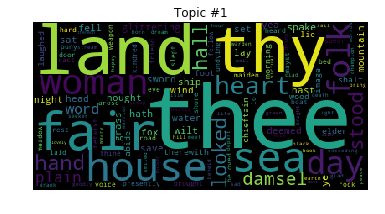

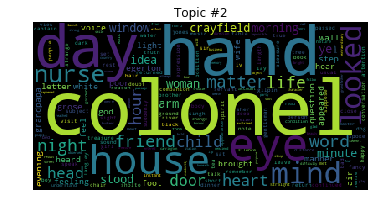

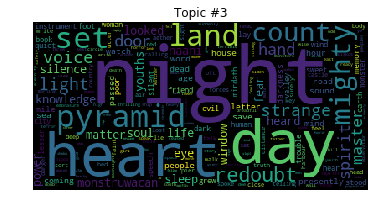

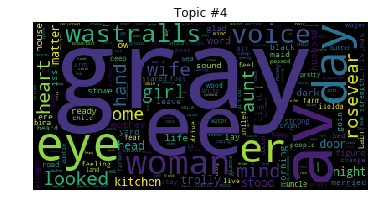

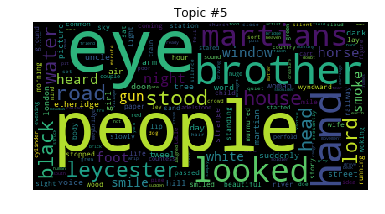

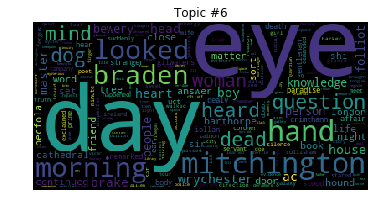

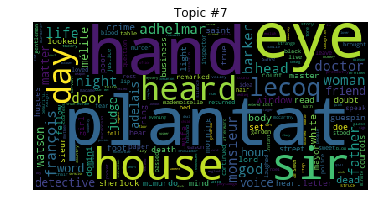

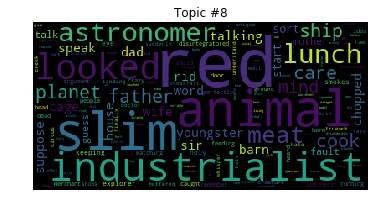

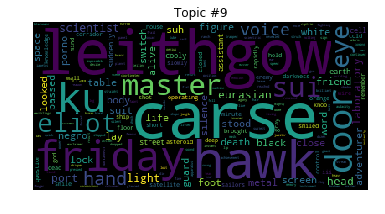

In [34]:
for t in range(ldamodel2.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel2.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [38]:
arr = []
for genre in genres:
    arr += [genre] * 5
print(arr)
for x, y in zip(corpus, arr):
    print(ldamodel2.get_document_topics(x), y)

['fantasy', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 'horror', 'horror', 'horror', 'horror', 'horror', 'mystery', 'mystery', 'mystery', 'mystery', 'mystery', 'romance', 'romance', 'romance', 'romance', 'romance', 'scifi', 'scifi', 'scifi', 'scifi', 'scifi']
[(6, 0.99985987)] fantasy
[(0, 0.99986535)] fantasy
[(3, 0.9998873)] fantasy
[(1, 0.9998925)] fantasy
[(7, 0.999893)] fantasy
[(0, 0.99986595)] horror
[(2, 0.9998631)] horror
[(2, 0.99990493)] horror
[(3, 0.9998924)] horror
[(0, 0.99967337)] horror
[(7, 0.9998724)] mystery
[(0, 0.08418186), (2, 0.21047437), (7, 0.7052311)] mystery
[(2, 0.9039914), (7, 0.09589834)] mystery
[(7, 0.9998555)] mystery
[(6, 0.9998651)] mystery
[(2, 0.9998847)] romance
[(2, 0.9998802)] romance
[(4, 0.99988353)] romance
[(2, 0.9998957)] romance
[(5, 0.99864286)] romance
[(6, 0.9992918)] scifi
[(9, 0.9998397)] scifi
[(8, 0.9990851)] scifi
[(5, 0.9999051)] scifi
[(5, 0.99947876)] scifi


In [18]:
def get_title(topic, n):
    weight_avg = np.zeros((300,), dtype='f')
    weight_total = 0
    for x in topic:
        if x[0] in model:
            weight_avg += model[x[0]] * x[1]
            weight_total += x[1]
    weight_avg /= weight_total
    weight_avg = np.array(weight_avg)
    return model.most_similar(positive=[weight_avg], negative=[], topn=n)

In [19]:
import gensim

In [20]:
model = gensim.models.KeyedVectors.load_word2vec_format('./review/GoogleNews-vectors-negative300.bin', binary=True)  

In [40]:
tempmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

In [44]:
for x in range(10):
    print("Topic", x)
    print(get_title(tempmodel.show_topic(x,10),1))

Topic 0
[('eye', 0.6766827702522278)]
Topic 1
[('sir', 0.6349490880966187)]
Topic 2
[('rafting_Riggins', 0.5780428051948547)]
Topic 3
[('%_#F########_7v.jsn', 0.5581647157669067)]
Topic 4
[('%_#F########_7v.jsn', 0.5539857149124146)]
Topic 5
[('door', 0.5935896635055542)]
Topic 6
[('door', 0.6120706796646118)]
Topic 7
[('eye', 0.5912182331085205)]
Topic 8
[('gray', 0.6902140378952026)]
Topic 9
[('smiled_Cavic', 0.5634182691574097)]


In [43]:
for x in range(10):
    print("Topic", x)
    print(get_title(tempmodel.show_topic(x,50),1))

Topic 0
[('Wretched_mortals_open', 0.6809468269348145)]
Topic 1
[('Wretched_mortals_open', 0.6488403081893921)]
Topic 2
[('%_#F########_7v.jsn', 0.6724457740783691)]
Topic 3
[('%_#F########_7v.jsn', 0.6506063342094421)]
Topic 4
[('%_#F########_7v.jsn', 0.657128095626831)]
Topic 5
[('%_#F########_7v.jsn', 0.6570405960083008)]
Topic 6
[('SeekingAffluent.com', 0.6332783699035645)]
Topic 7
[('Wretched_mortals_open', 0.6534968614578247)]
Topic 8
[('Ding_dang', 0.6644299030303955)]
Topic 9
[('%_#F########_7v.jsn', 0.6523594856262207)]


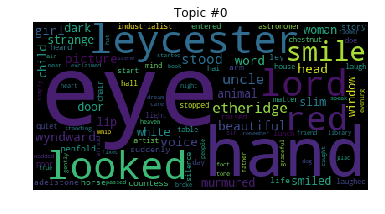

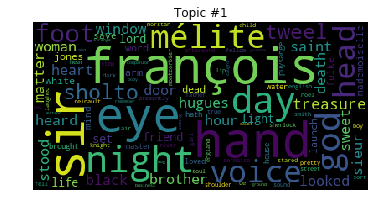

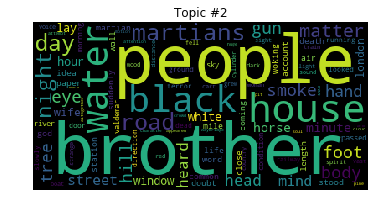

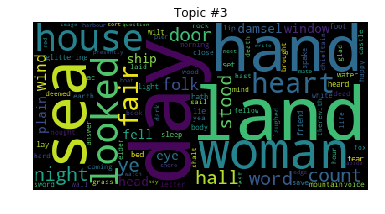

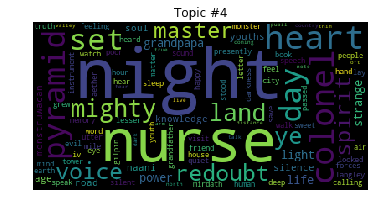

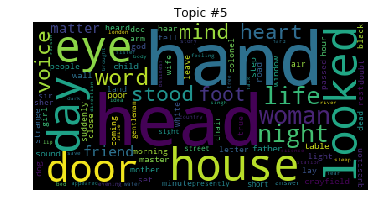

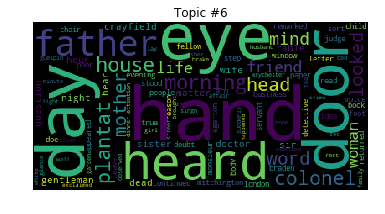

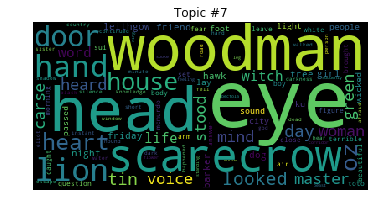

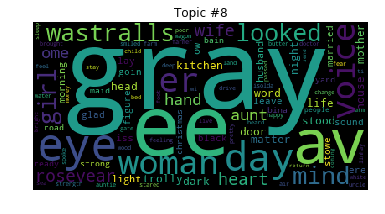

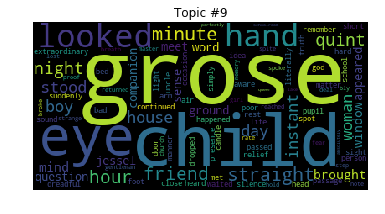

In [41]:
for t in range(tempmodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(tempmodel.show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

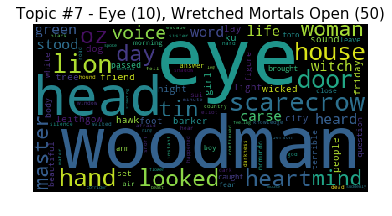

In [45]:
n=7
plt.figure()
plt.imshow(WordCloud().fit_words(dict(tempmodel.show_topic(n, 100))))
plt.axis("off")
plt.title("Topic #" + str(n) + " - Eye (10), Wretched Mortals Open (50)" ,fontsize=15)
plt.show()

In [39]:
ldamodel2

NameError: name 'ldamodel2' is not defined